In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib
%matplotlib inline

In [12]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 5)
matplotlib.rcParams['figure.dpi'] = (100)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
iris_df = sns.load_dataset('iris')

In [6]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [32]:
iris_df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

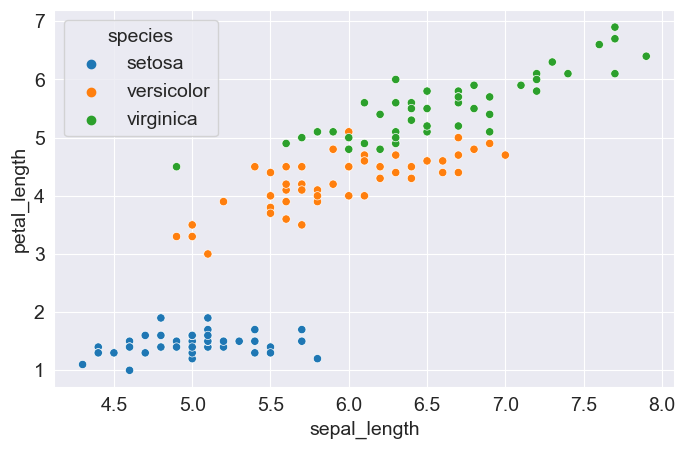

In [13]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species');

## CLUSTERING

In [14]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

In [15]:
X = iris_df[numeric_cols]

In [16]:
from sklearn.cluster import KMeans

In [17]:
model = KMeans(n_clusters=3, random_state=42)

In [18]:
model.fit(X)

KMeans(n_clusters=3, random_state=42)

#### 检查每个集群的集群中心以及使用模型对点进行分类

In [23]:
## 三种类型的特征：
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [20]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
preds = model.predict(X)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

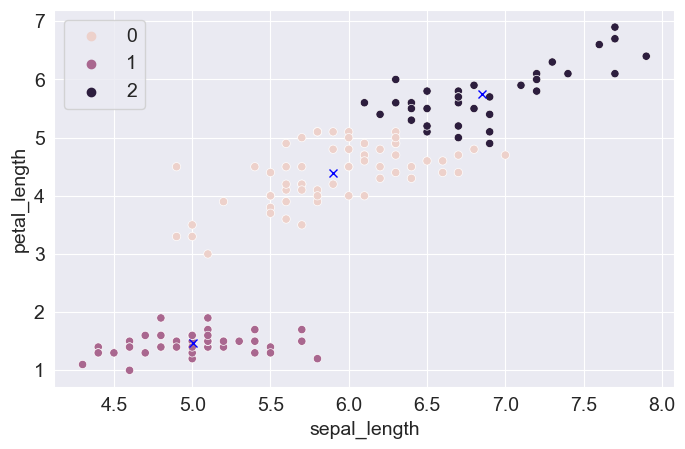

In [25]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds)

centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]

plt.plot(centers_x, centers_y, 'xb')  ## 'xb' = mark the cluster_centers
plt.show()

#### 检查拟合的“优度”其中包含样本到它们最近的聚类中心的平方距离的总和来降低惯性，更好地贴合;

In [26]:
model.inertia_

78.85144142614601

#### 尝试创建 6 个集群

In [27]:
model = KMeans(n_clusters=6, random_state=42).fit(X)

In [28]:
preds = model.predict(X)
preds

array([5, 1, 1, 1, 5, 5, 1, 5, 1, 1, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5,
       1, 5, 1, 1, 5, 5, 5, 1, 1, 5, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 1, 5,
       5, 1, 5, 1, 5, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3], dtype=int32)

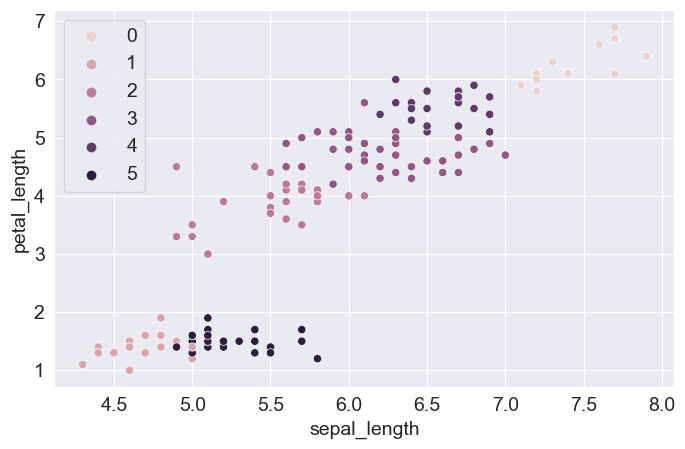

In [29]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds)

In [30]:
model.inertia_

39.03998724608725

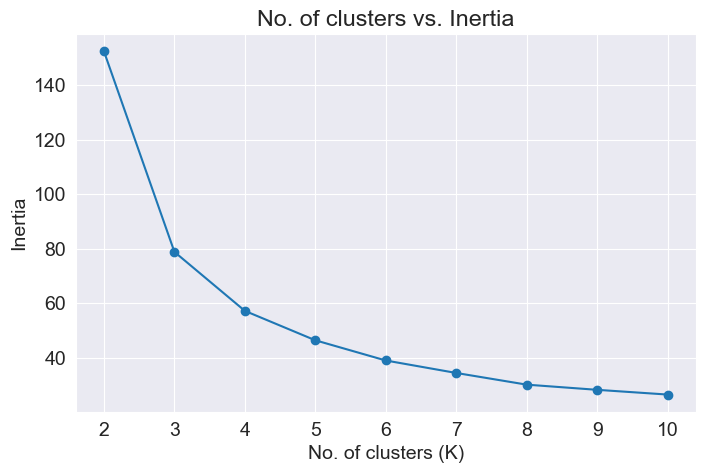

In [31]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

# DBSCAN

In [33]:
from sklearn.cluster import DBSCAN

In [35]:
?DBSCAN

In [36]:
model = DBSCAN(eps=1.1, min_samples=4)

In [37]:
model.fit(X)

DBSCAN(eps=1.1, min_samples=4)

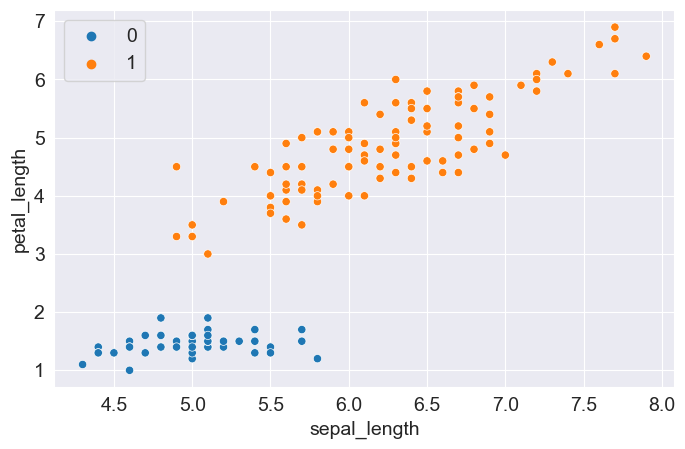

In [38]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=model.labels_)

## Dimensionality Reduction and Manifold Learning

In [41]:
from sklearn.decomposition import PCA

In [39]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [40]:
numeric_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [42]:
pca = PCA(n_components=2)

In [43]:
pca.fit(iris_df[numeric_cols])

PCA(n_components=2)

In [44]:
pca

PCA(n_components=2)

In [45]:
transformed = pca.transform(iris_df[numeric_cols])

In [52]:
transformed[0:5,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

<AxesSubplot:>

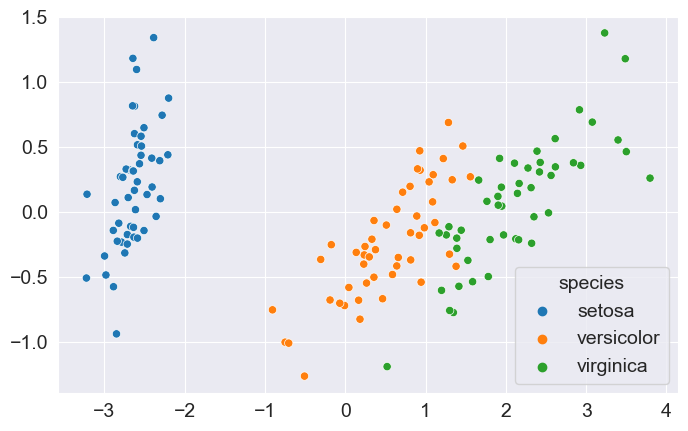

In [47]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species'])

## t-SNE

In [53]:
from sklearn.manifold import TSNE

In [54]:
tsne = TSNE(n_components=2)

In [55]:
transformed = tsne.fit_transform(iris_df[numeric_cols])

/Users/zll/Library/Mobile Documents/com~apple~CloudDocs/Python Data Science/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/zll/Library/Mobile Documents/com~apple~CloudDocs/Python Data Science/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


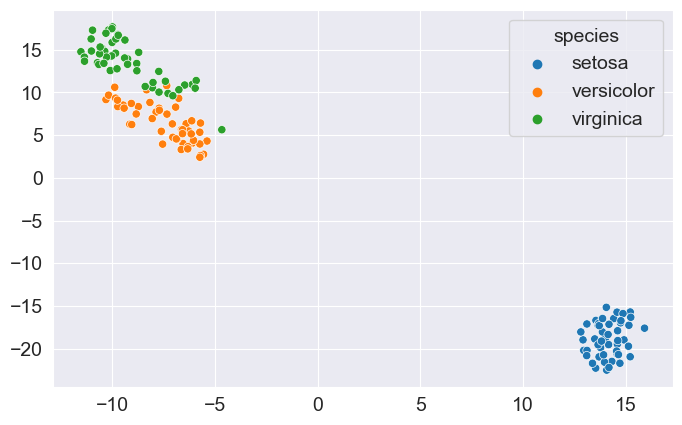

In [57]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species'])
plt.show()